## Vilzuallizing the b-scan from the original 99_R_2_1_Segm.xls file

- imageID is the B-scan number in F column and 1st row and then 36, 70 and so on
- for each b-scan layers are stored in order starting from 3rd row with increment of 3 rows. Then the layers for the next b-scan start from 37th row and then 71 and so on



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# For reading .xls files, install xlrd otherwise comment out the import
import xlrd

In [14]:
file_path = '/home/suraj/Git/SCR-Progression/test_annotations.xlsx'

In [15]:
#load the xlsx file
data = pd.read_excel(file_path, engine='openpyxl')
#for the orioginal .xls file format
#data = xlrd.open_workbook('/home/suraj/Git/SCR-Progression/99_R_2_1_Segm.xls')

In [16]:
#define the layers
layers = ['ILM', 'NFL', 'GCL', 'IPL', 'INL', 'OPL', 'ELM', 'PR1', 'PR2', 'RPE', 'BM']

In [ ]:
#loop through all the B-scans
row_idx = 1 #starting row for first ImageID
while row_idx < len(data):
    #get the ImageID for the current B-scan
    image_id = data.iloc[row_idx, 5]  # ImageID is in column F (0 based index: 5)
    
    if pd.isna(image_id) or image_id is None: #breaks the loop if no more ImageID present
        break 
    
    # Determine the layer rows for the current B-scan
    start_row = row_idx + 2  # Layers start 2 row after ImageID

    layer_rows = [start_row + i * 3 for i in range(len(layers))]  # 11  layers, each 3 rows apart

    # Initialize the plot
    plt.figure(figsize=(12, 8))
    previous_y = None

    # Plot each layer
    for layer, row_idx_layer in zip(layers, layer_rows):
        # Extract the row for the current layer
        layer_data = data.iloc[row_idx_layer - 1, :] # Adjust for 0-based indexing
        # Get valid data (columns 260 to 768, 0-based index 259 to 767)
        x = range(260, 769) # A-scan indices
        y = layer_data[259:768].values # Depth values
        # Convert to numeric, handling any non-numeric values
        y = pd.to_numeric(y, errors='coerce')

        # Plot the layer
        plt.plot(x, y, label=layer, linewidth=2)

        # Fill between this layer and the previous one
        if previous_y is not None:
            plt.fill_between(x, previous_y, y, alpha=0.2)
        previous_y = y

    # Customize the plot
    plt.xlabel('A-Scan Index')
    plt.ylabel('Depth (µm)')
    plt.title(f'Retinal Layer Boundaries for B-Scan (ImageID {image_id})')
    plt.legend()
    plt.gca().invert_yaxis() # Invert y-axis so deeper layers appear lower
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'bscan_{image_id}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # move to the next B-scan
    row_idx += 34

In [ ]:
def plot_bscan_layers(data, layers, layer_rows)-> None:
    """
    Plots the retinal layer boundaries for a B-scan from OCT data.
    
    Args:
    - data: DataFrame containing the OCT data.
    - layers: List of layer names to plot.
    - layer_rows: List of row indices corresponding to each layer in the DataFrame.
    """

## Plotting a single b-scan using hardcoded data

In [3]:
file_path = '/home/suraj/Git/SCR-Progression/sample-oct-annotations.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

In [4]:
# Define the layers (update with actual layer names if different)
layers = ['ILM', 'NFL', 'GCL', 'IPL', 'INL', 'OPL', 'ELM', 'PR1', 'PR2', 'RPE', 'BM']
layer_rows = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32]

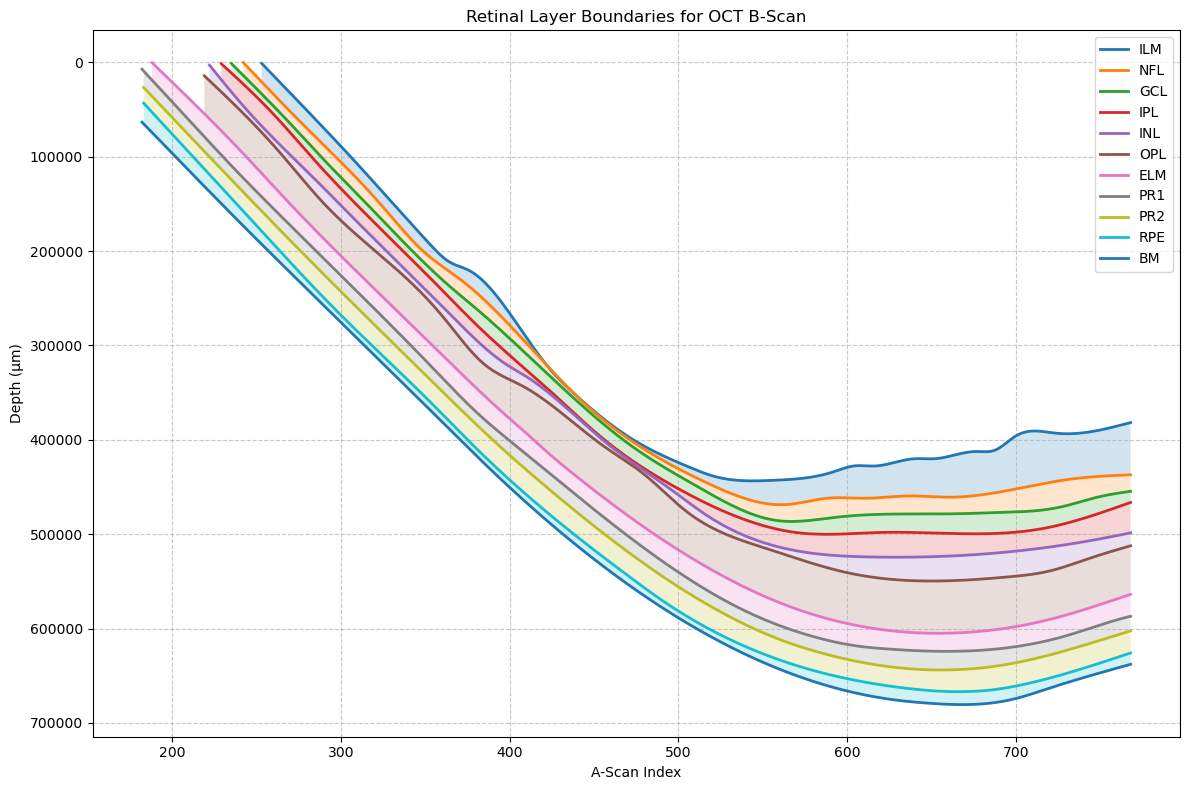

In [12]:
#plotting the First B-scan layers

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot each layer and fill between consecutive layers
previous_y = None
for i, (layer, row_idx) in enumerate(zip(layers, layer_rows)):
    # Extract the row for the current layer
    layer_data = data.iloc[row_idx - 1, :] # Adjust for 0-based indexing
    # Get valid data (columns 260 to 768, 0-based index 259 to 767)
    x = range(10, 769) # A-scan indices
    y = layer_data[9:768].values # Depth values (columns 260 to 768)
    # Convert to numeric, handling any non-numeric values
    y = pd.to_numeric(y, errors='coerce')
    # Plot the layer
    plt.plot(x, y, label=layer, linewidth=2)
    # Fill between this layer and the previous one
    if previous_y is not None:
        plt.fill_between(x, previous_y, y, alpha=0.2)
    previous_y = y

# Customize the plot
plt.xlabel('A-Scan Index')
plt.ylabel('Depth (µm)')
plt.title('Retinal Layer Boundaries for OCT B-Scan')
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis so deeper layers appear lower
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()